### To pair customer with products by finding the probability of purchasing that product by the customer

In [1]:
# Required libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.use('Agg')

In [2]:
# Training data
train_data = pd.read_pickle('train_processed_2_months.pkl')

0    1232311
1        175
Name: Saving_Account, dtype: int64

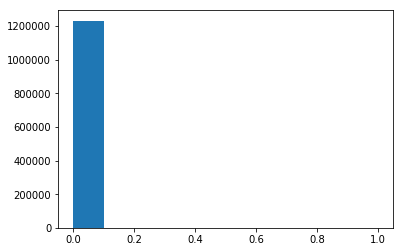

In [3]:
# Imbalance in Savings_Account
plt.hist(train_data['Saving_Account'])
train_data['Saving_Account'].value_counts()

### We can see that for this column the ratio of class 0 labels to class 1 labels is more than 10:1, therefore the dataset for 'Savings Account' is unbalanced.

In [3]:
# The names of our features
features = ['Age', 'Customer_Seniority',
       'Household_Income', 'New_customer_index', 'Activity_Index_0.0',
       'Activity_Index_1.0', 'Customer_Relation_Type_Beginning_Month_A',
       'Customer_Relation_Type_Beginning_Month_I',
       'Customer_Relation_Type_Beginning_Month_N',
       'Customer_Relation_Type_Beginning_Month_P',
       'Customer_Relation_Type_Beginning_Month_R', 'Province_Name_ALAVA',
       'Province_Name_ALBACETE', 'Province_Name_ALICANTE',
       'Province_Name_ALMERIA', 'Province_Name_ASTURIAS',
       'Province_Name_AVILA', 'Province_Name_BADAJOZ',
       'Province_Name_BALEARS, ILLES', 'Province_Name_BARCELONA',
       'Province_Name_BIZKAIA', 'Province_Name_BURGOS',
       'Province_Name_CACERES', 'Province_Name_CADIZ',
       'Province_Name_CANTABRIA', 'Province_Name_CASTELLON',
       'Province_Name_CEUTA', 'Province_Name_CIUDAD REAL',
       'Province_Name_CORDOBA', 'Province_Name_CORUÑA, A',
       'Province_Name_CUENCA', 'Province_Name_GIPUZKOA',
       'Province_Name_GIRONA', 'Province_Name_GRANADA',
       'Province_Name_GUADALAJARA', 'Province_Name_HUELVA',
       'Province_Name_HUESCA', 'Province_Name_JAEN', 'Province_Name_LEON',
       'Province_Name_LERIDA', 'Province_Name_LUGO', 'Province_Name_MADRID',
       'Province_Name_MALAGA', 'Province_Name_MELILLA', 'Province_Name_MURCIA',
       'Province_Name_NAVARRA', 'Province_Name_OURENSE',
       'Province_Name_PALENCIA', 'Province_Name_PALMAS, LAS',
       'Province_Name_PONTEVEDRA', 'Province_Name_RIOJA, LA',
       'Province_Name_SALAMANCA', 'Province_Name_SANTA CRUZ DE TENERIFE',
       'Province_Name_SEGOVIA', 'Province_Name_SEVILLA', 'Province_Name_SORIA',
       'Province_Name_TARRAGONA', 'Province_Name_TERUEL',
       'Province_Name_TOLEDO', 'Province_Name_VALENCIA',
       'Province_Name_VALLADOLID', 'Province_Name_ZAMORA',
       'Province_Name_ZARAGOZA', 'Sex_H', 'Sex_V', 'Foreigner_Index_N',
       'Foreigner_Index_S', 'Residence_Index_N', 'Residence_Index_S',
       'Segmentation_01 - TOP', 'Segmentation_02 - PARTICULARES',
       'Segmentation_03 - UNIVERSITARIO']

In [5]:
# Oversampling to decrease imbalance in product columns for Saving Account
from imblearn.over_sampling import SMOTE

X = train_data[features]
y = train_data['Saving_Account']

sm = SMOTE()
X, y = sm.fit_sample(X, y)

1    1232311
0    1232311
dtype: int64

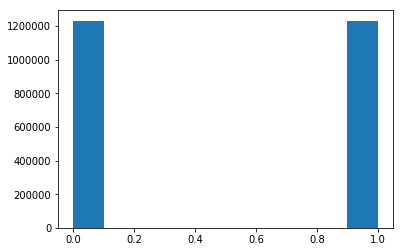

In [6]:
# Ratio of classes after over-sampling
plt.hist(y)
pd.Series(y).value_counts()

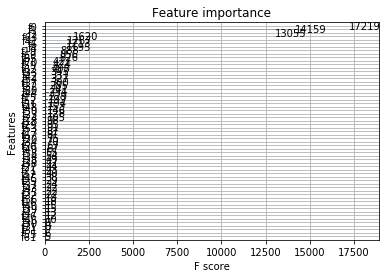

[[9.99924660e-01 7.53187778e-05]
 [1.16467476e-04 9.99883533e-01]
 [5.16176224e-04 9.99483824e-01]
 ...
 [1.20759010e-04 9.99879241e-01]
 [3.03387642e-04 9.99696612e-01]
 [7.56978989e-05 9.99924302e-01]]
Accuracy: 99.99%


In [7]:
# XGboost
#XGBoost model 1 for saving Account
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import plot_importance
from matplotlib import pyplot

# Training and testing datasplits
seed = 7
test_size = 0.33


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)

# Train the XGboost model

Accuracy=[]
model = XGBClassifier(n_jobs=-1,max_depth=60,n_estimators=90)
model.fit(X_train, y_train)
plot_importance(model)
pyplot.show()
# Fit model using each importance as a threshold
from sklearn.feature_selection import SelectFromModel
from numpy import sort

predictions = model.predict(X_test)
prediction_prob = model.predict_proba(X_test)

# # Check the accuracy
print(prediction_prob)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [8]:
# Log loss for current Account
from sklearn.metrics import log_loss
log_loss(y_test,prediction_prob)

0.0006533781194793434

In [9]:
#Classification Report and confusion matrix - model 1 for saving Account

from sklearn.metrics import classification_report
print("classification_report:")
print(classification_report(y_test,predictions))



from sklearn.metrics import confusion_matrix
M=confusion_matrix(y_test,predictions)
print("Confusion matrix for model_1_xgboost:")
print(M)

classification_report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    406355
           1       1.00      1.00      1.00    406971

   micro avg       1.00      1.00      1.00    813326
   macro avg       1.00      1.00      1.00    813326
weighted avg       1.00      1.00      1.00    813326

Confusion matrix for model_1_xgboost:
[[406265     90]
 [    11 406960]]


In [10]:
# save the model to disk
import pickle
filename = 'saving_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [11]:
# 2D clustering using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(X)
pca_output = pca.transform(X)

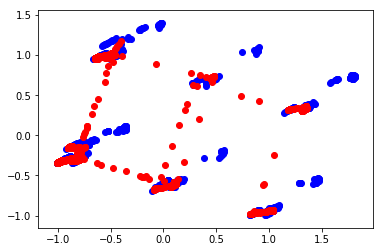

In [13]:
for i in range(300000,len(y),1000):
    if y[i]==0:
        plt.scatter(pca_output[i,0],pca_output[i,1],c='b')
    elif y[i]==1:
        plt.scatter(pca_output[i,0],pca_output[i,1],c='r')
plt.show()

In [12]:
# Oversampling to decrease imbalance in product columns for current Account
from imblearn.over_sampling import SMOTE

X_curr_acc = train_data[features]
y_curr_acc = train_data['Current_Account']

sm = SMOTE()
X_curr_acc,y_curr_acc = sm.fit_sample(X_curr_acc, y_curr_acc )

(1932450, 72)

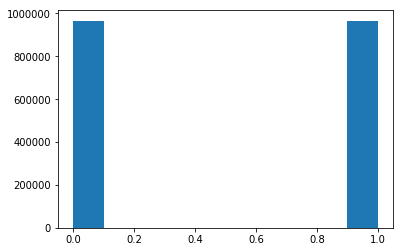

In [13]:
# Imbalance in current_Account
plt.hist(y_curr_acc)
X_curr_acc.shape

In [14]:
#XGBoost model 1 for current Account
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Training and testing datasplits
seed = 100
test_size = 0.33
X_train_curr_acc, X_test_curr_acc, y_train_curr_acc, y_test_curr_acc= train_test_split(X_curr_acc,y_curr_acc,test_size=test_size, random_state=seed)

# Train the XGboost model
model = XGBClassifier(n_jobs=-1,gamma=2,learning_rate=0.1,max_depth=70,n_estimators=90)
model.fit(X_train_curr_acc, y_train_curr_acc)
predictions_curr_acc = model.predict(X_test_curr_acc)
pred_prob_curr_acc = model.predict_proba(X_test_curr_acc)
#             #print(pred_prob_curr_acc)
accuracy_curr_acc = accuracy_score(y_test_curr_acc, predictions_curr_acc)

print("Accuracy: %.2f%%" % (accuracy_curr_acc * 100.0))


Accuracy: 92.26%


In [15]:
# Log loss for current Account
from sklearn.metrics import log_loss
log_loss(y_test_curr_acc,pred_prob_curr_acc)

0.2197973270718374

In [16]:
#Classification Report and confusion matrix - model 1 for current Account

from sklearn.metrics import classification_report
print("classification_report for current_account:")
print(classification_report(y_test_curr_acc,predictions_curr_acc))



from sklearn.metrics import confusion_matrix
M_cu_ac=confusion_matrix(y_test_curr_acc,predictions_curr_acc)
print("Confusion matrix for model_xgboost_Curr_Acc:")
print(M_cu_ac)

classification_report for current_account:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92    319371
           1       0.93      0.91      0.92    318338

   micro avg       0.92      0.92      0.92    637709
   macro avg       0.92      0.92      0.92    637709
weighted avg       0.92      0.92      0.92    637709

Confusion matrix for model_xgboost_Curr_Acc:
[[297844  21527]
 [ 27842 290496]]


In [17]:
# save the model to disk
import pickle
filename = 'current_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [18]:
# Oversampling to decrease imbalance in product columns for Derivada Account
from imblearn.over_sampling import SMOTE

X_deri_acc = train_data[features]
y_deri_acc = train_data['Derivada_Account']

sm = SMOTE()
X_deri_acc,y_deri_acc = sm.fit_sample(X_deri_acc, y_deri_acc )

(2463784,)

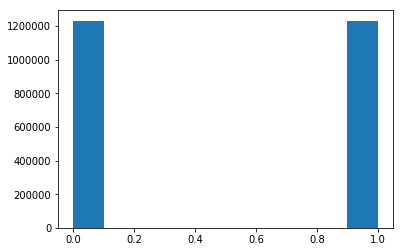

In [19]:
# Imbalance in derivada_Account
plt.hist(y_deri_acc)
y_deri_acc.shape

In [20]:
#XGBoost model 1 for derivada Account
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Training and testing datasplits
seed = 100
test_size = 0.33
X_train_deri_acc, X_test_deri_acc, y_train_deri_acc, y_test_deri_acc= train_test_split(X_deri_acc,y_deri_acc,test_size=test_size, random_state=seed)

# Train the XGboost model
model = XGBClassifier(n_jobs=-1,gamma=2,learning_rate=0.1,max_depth=50,n_estimators=60)
model.fit(X_train_deri_acc,  y_train_deri_acc)
predictions_deri_acc = model.predict(X_test_deri_acc)
pred_prob_deri_acc = model.predict_proba(X_test_deri_acc)

# Check the accuracy
accuracy_deri_acc = accuracy_score(y_test_deri_acc, predictions_deri_acc)
print("Accuracy: %.2f%%" % (accuracy_deri_acc * 100.0))

Accuracy: 99.94%


In [21]:
#Classification Report and confusion matrix - model 1 for derivada Account

from sklearn.metrics import classification_report
print("classification_report for derivada account:")
print(classification_report(y_test_deri_acc,predictions_deri_acc))



from sklearn.metrics import confusion_matrix
M_de_ac=confusion_matrix(y_test_deri_acc,predictions_deri_acc)
print("Confusion matrix for model_xgboost_deri_Acc:")
print(M_de_ac)

classification_report for derivada account:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    406264
           1       1.00      1.00      1.00    406785

   micro avg       1.00      1.00      1.00    813049
   macro avg       1.00      1.00      1.00    813049
weighted avg       1.00      1.00      1.00    813049

Confusion matrix for model_xgboost_deri_Acc:
[[405797    467]
 [    47 406738]]


In [22]:
#log loss for derivada account

from sklearn.metrics import log_loss
log_loss(y_test_deri_acc,pred_prob_deri_acc)


0.004552701567930772

In [23]:
# save the model to disk
import pickle
filename = 'derivada_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [24]:
# Oversampling to decrease imbalance in product columns for payroll Account
from imblearn.over_sampling import SMOTE

X_Pay_acc = train_data[features]
y_Pay_acc = train_data['Payroll_Account']

sm = SMOTE()
X_pay_acc,y_pay_acc = sm.fit_sample(X_Pay_acc, y_Pay_acc )

(2229114,)

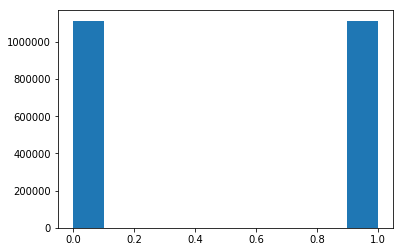

In [25]:
# Imbalance in payroll_Account
plt.hist(y_pay_acc)
y_pay_acc.shape

In [26]:
#XGBoost model 1 for payroll Account
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Training and testing datasplits
seed = 100
test_size = 0.33
X_train_pay_acc, X_test_pay_acc, y_train_pay_acc, y_test_pay_acc= train_test_split(X_pay_acc,y_pay_acc,test_size=test_size, random_state=seed)

# Train the XGboost model
model = XGBClassifier(n_jobs=-1,gamma=2,learning_rate=0.1,max_depth=75,n_estimators=70)
model.fit(X_train_pay_acc,  y_train_pay_acc)
predictions_pay_acc = model.predict(X_test_pay_acc)
pred_prob_pay_acc = model.predict_proba(X_test_pay_acc)

# Check the accuracy
accuracy_pay_acc = accuracy_score(y_test_pay_acc, predictions_pay_acc)
print("Accuracy: %.2f%%" % (accuracy_pay_acc * 100.0))

Accuracy: 95.65%


In [27]:
# Log loss for payroll account
from sklearn.metrics import log_loss
log_loss(y_test_pay_acc,pred_prob_pay_acc)

0.1324984990333086

In [28]:
#Classification Report and confusion matrix - model 1 for payroll Account

from sklearn.metrics import classification_report
print("classification_report for payroll account:")
print(classification_report(y_test_pay_acc,predictions_pay_acc))

from sklearn.metrics import confusion_matrix
M_pay_ac=confusion_matrix(y_test_pay_acc,predictions_pay_acc)
print("Confusion matrix for model_xgboost_pay_Acc:")
print(M_pay_ac)

classification_report for payroll account:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96    367558
           1       0.94      0.98      0.96    368050

   micro avg       0.96      0.96      0.96    735608
   macro avg       0.96      0.96      0.96    735608
weighted avg       0.96      0.96      0.96    735608

Confusion matrix for model_xgboost_pay_Acc:
[[344686  22872]
 [  9154 358896]]


In [29]:
# save the model to disk
import pickle
filename = 'payroll_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [8]:
# Oversampling to decrease imbalance in product columns for Junior Account
from imblearn.over_sampling import SMOTE

X_juni_acc = train_data[features]
y_juni_acc = train_data['Junior_Account']

sm = SMOTE()
X_juni_acc,y_juni_acc = sm.fit_sample(X_juni_acc, y_juni_acc )

(2434278,)

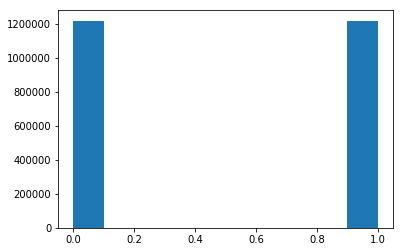

In [9]:
# Imbalance in Junior_Account
plt.hist(y_juni_acc)
y_juni_acc.shape

In [10]:
#XGBoost model 1 for junior Account
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Training and testing datasplits
seed = 100
test_size = 0.33
X_train_juni_acc, X_test_juni_acc, y_train_juni_acc, y_test_juni_acc= train_test_split(X_juni_acc,y_juni_acc,test_size=test_size, random_state=seed)

# Train the XGboost model
model = XGBClassifier(n_jobs=-1)
model.fit(X_train_juni_acc, y_train_juni_acc)
predictions_juni_acc = model.predict(X_test_juni_acc)
pred_prob_juni_acc = model.predict_proba(X_test_juni_acc)

# Check the accuracy
accuracy_juni_acc = accuracy_score(y_test_juni_acc, predictions_juni_acc)
print("Accuracy: %.2f%%" % (accuracy_juni_acc * 100.0))

Accuracy: 99.67%


In [11]:
# Log loss for junior account
from sklearn.metrics import log_loss
log_loss(y_test_juni_acc,pred_prob_juni_acc)

0.007358491346641206

In [12]:
#Classification Report and confusion matrix - model 1 for junior Account

from sklearn.metrics import classification_report
print("classification_report for Junior account:")
print(classification_report(y_test_juni_acc,predictions_juni_acc))

from sklearn.metrics import confusion_matrix
M_juni_ac=confusion_matrix(y_test_juni_acc,predictions_juni_acc)
print("Confusion matrix for model_xgboost_juni_Acc:")
print(M_juni_ac)

classification_report for Junior account:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    401592
           1       0.99      1.00      1.00    401720

   micro avg       1.00      1.00      1.00    803312
   macro avg       1.00      1.00      1.00    803312
weighted avg       1.00      1.00      1.00    803312

Confusion matrix for model_xgboost_juni_Acc:
[[399106   2486]
 [   155 401565]]


In [13]:
# save the model to disk
import pickle
filename = 'junior_acc_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [14]:
# Oversampling to decrease imbalance in product columns for MAS_Particular Account
from imblearn.over_sampling import SMOTE

X_MPA_acc = train_data[features]
y_MPA_acc = train_data['MAS_Particular_Account']

sm = SMOTE()
X_MPA_acc,y_MPA_acc = sm.fit_sample(X_MPA_acc, y_MPA_acc )

(2432396,)

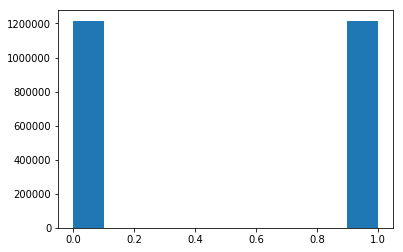

In [15]:
# Imbalance in MAS_Particular_Account
plt.hist(y_MPA_acc)
y_MPA_acc.shape

In [16]:
#XGBoost model 1 for MAS_Particular_Account
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Training and testing datasplits
seed = 100
test_size = 0.33
X_train_MPA_acc, X_test_MPA_acc, y_train_MPA_acc, y_test_MPA_acc= train_test_split(X_MPA_acc,y_MPA_acc,test_size=test_size, random_state=seed)

# Train the XGboost model
model = XGBClassifier(n_jobs=-1,gamma=2,learning_rate=0.1,max_depth=60,n_estimators=70)
model.fit(X_train_MPA_acc, y_train_MPA_acc)
predictions_MPA_acc = model.predict(X_test_MPA_acc)
pred_prob_MPA_acc = model.predict_proba(X_test_MPA_acc)

# Check the accuracy
accuracy_MPA_acc = accuracy_score(y_test_MPA_acc, predictions_MPA_acc)
print("Accuracy: %.2f%%" % (accuracy_MPA_acc * 100.0))

Accuracy: 99.03%


In [17]:
# Log loss for MAS_Particular_Account
from sklearn.metrics import log_loss
log_loss(y_test_MPA_acc,pred_prob_MPA_acc)

0.03209586918059638

In [18]:
#Classification Report and confusion matrix - model 1 for MAS_Particular_Account
from sklearn.metrics import classification_report
print("classification_report for MAS_Particular_Account:")
print(classification_report(y_test_MPA_acc,predictions_MPA_acc))

from sklearn.metrics import confusion_matrix
M_MPA_ac=confusion_matrix(y_test_MPA_acc,predictions_MPA_acc)
print("Confusion matrix for model_xgboost_MPA_Acc:")
print(M_MPA_ac)

classification_report for MAS_Particular_Account:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    401167
           1       0.98      1.00      0.99    401524

   micro avg       0.99      0.99      0.99    802691
   macro avg       0.99      0.99      0.99    802691
weighted avg       0.99      0.99      0.99    802691

Confusion matrix for model_xgboost_MPA_Acc:
[[394029   7138]
 [   676 400848]]


In [19]:
# save the model to disk
import pickle
filename = 'mpa_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [20]:
# Oversampling to decrease imbalance in product columns for Particular Account
from imblearn.over_sampling import SMOTE

X_PA_acc = train_data[features]
y_PA_acc = train_data['Particular_Account']

sm = SMOTE()
X_PA_acc,y_PA_acc = sm.fit_sample(X_PA_acc, y_PA_acc )

(2047348,)

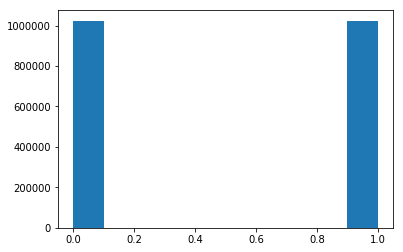

In [21]:
# Imbalance in Particular_Account
plt.hist(y_PA_acc)
y_PA_acc.shape

In [22]:
#XGBoost model 1 for Particular_Account
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Training and testing datasplits
seed = 100
test_size = 0.33
X_train_PA_acc, X_test_PA_acc, y_train_PA_acc, y_test_PA_acc= train_test_split(X_PA_acc,y_PA_acc,test_size=test_size, random_state=seed)

# Train the XGboost model
model = XGBClassifier(n_jobs=-1,gamma=2,learning_rate=0.1,max_depth=80,n_estimators=70)
model.fit(X_train_PA_acc, y_train_PA_acc)
predictions_PA_acc = model.predict(X_test_PA_acc)
pred_prob_PA_acc = model.predict_proba(X_test_PA_acc)

# Check the accuracy
accuracy_PA_acc = accuracy_score(y_test_PA_acc, predictions_PA_acc)
print("Accuracy: %.2f%%" % (accuracy_PA_acc * 100.0))

Accuracy: 94.81%


In [23]:
# Log loss for Particular_Account
from sklearn.metrics import log_loss
log_loss(y_test_PA_acc,pred_prob_PA_acc)

0.1413730571428676

In [24]:
#Classification Report and confusion matrix - model 1 for Particular_Account
from sklearn.metrics import classification_report
print("classification_report for Particular_Account:")
print(classification_report(y_test_PA_acc,predictions_PA_acc))

from sklearn.metrics import confusion_matrix
M_PA_ac=confusion_matrix(y_test_PA_acc,predictions_PA_acc)
print("Confusion matrix for model_xgboost_PA_Acc:")
print(M_PA_ac)

classification_report for Particular_Account:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95    337777
           1       0.92      0.98      0.95    337848

   micro avg       0.95      0.95      0.95    675625
   macro avg       0.95      0.95      0.95    675625
weighted avg       0.95      0.95      0.95    675625

Confusion matrix for model_xgboost_PA_Acc:
[[310637  27140]
 [  7957 329891]]


In [25]:
# save the model to disk
import pickle
filename = 'particluar_acc_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [26]:
# Oversampling to decrease imbalance in product columns for Particular_Plus_Account
from imblearn.over_sampling import SMOTE

X_PPA_acc = train_data[features]
y_PPA_acc = train_data['Particular_Plus_Account']

sm = SMOTE()
X_PPA_acc,y_PPA_acc = sm.fit_sample(X_PPA_acc, y_PPA_acc )

(2322498,)

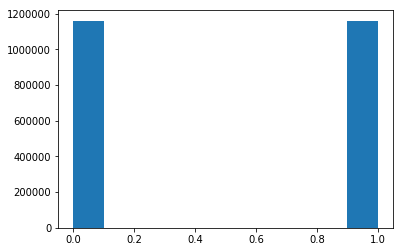

In [27]:
# Imbalance in Particular_Plus_Account
plt.hist(y_PPA_acc)
y_PPA_acc.shape

In [28]:
#XGBoost model 1 for Particular_Plus_Account
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Training and testing datasplits
seed = 100
test_size = 0.33
X_train_PPA_acc, X_test_PPA_acc, y_train_PPA_acc, y_test_PPA_acc= train_test_split(X_PPA_acc,y_PPA_acc,test_size=test_size, random_state=seed)

# Train the XGboost model
model = XGBClassifier(n_jobs=-1,gamma=2,learning_rate=0.1,max_depth=70,n_estimators=60)
model.fit(X_train_PPA_acc, y_train_PPA_acc)
predictions_PPA_acc = model.predict(X_test_PPA_acc)
pred_prob_PPA_acc = model.predict_proba(X_test_PPA_acc)

# Check the accuracy
accuracy_PPA_acc = accuracy_score(y_test_PPA_acc, predictions_PPA_acc)
print("Accuracy: %.2f%%" % (accuracy_PPA_acc * 100.0))

Accuracy: 97.43%


In [29]:
# Log loss for Particular_Plus_Account
from sklearn.metrics import log_loss
log_loss(y_test_PPA_acc,pred_prob_PPA_acc)

0.08525938013425133

In [30]:
#Classification Report and confusion matrix - model 1 for Particular_Plus_Account
from sklearn.metrics import classification_report
print("classification_report for Particular_Plus_Account:")
print(classification_report(y_test_PPA_acc,predictions_PPA_acc))

from sklearn.metrics import confusion_matrix
M_PPA_ac=confusion_matrix(y_test_PPA_acc,predictions_PPA_acc)
print("Confusion matrix for model_xgboost_PPA_Acc:")
print(M_PPA_ac)

classification_report for Particular_Plus_Account:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97    383280
           1       0.96      0.99      0.97    383145

   micro avg       0.97      0.97      0.97    766425
   macro avg       0.97      0.97      0.97    766425
weighted avg       0.97      0.97      0.97    766425

Confusion matrix for model_xgboost_PPA_Acc:
[[367898  15382]
 [  4281 378864]]


In [31]:
# save the model to disk
import pickle
filename = 'ppa_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [32]:
# Oversampling to decrease imbalance in product columns for Short_Term_Deposit
from imblearn.over_sampling import SMOTE

X_STD_acc = train_data[features]
y_STD_acc = train_data['Short_Term_Deposit']

sm = SMOTE()
X_STD_acc,y_STD_acc = sm.fit_sample(X_STD_acc, y_STD_acc )

(2458008,)

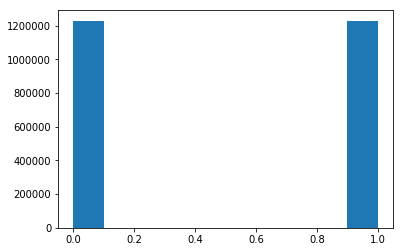

In [33]:
# Imbalance in Short_Term_Deposit
plt.hist(y_STD_acc)
y_STD_acc.shape

In [34]:
#XGBoost model 1 for Short_Term_Deposit
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Training and testing datasplits
seed = 100
test_size = 0.33
X_train_STD_acc, X_test_STD_acc, y_train_STD_acc, y_test_STD_acc= train_test_split(X_STD_acc,y_STD_acc,test_size=test_size, random_state=seed)

# Train the XGboost model
model = XGBClassifier(n_jobs=-1,gamma=2,learning_rate=0.1,max_depth=70,n_estimators=70)
model.fit(X_train_STD_acc, y_train_STD_acc)
predictions_STD_acc = model.predict(X_test_STD_acc)
pred_prob_STD_acc = model.predict_proba(X_test_STD_acc)

# Check the accuracy
accuracy_STD_acc = accuracy_score(y_test_STD_acc, predictions_STD_acc)
print("Accuracy: %.2f%%" % (accuracy_STD_acc * 100.0))

Accuracy: 99.54%


In [35]:
# Log loss for Short_Term_Deposit
from sklearn.metrics import log_loss
log_loss(y_test_STD_acc,pred_prob_STD_acc)

0.017800858467526597

In [36]:
#Classification Report and confusion matrix - model 1 for Short_Term_Deposit
from sklearn.metrics import classification_report
print("classification_report for Short_Term_Deposit:")
print(classification_report(y_test_STD_acc,predictions_STD_acc))

from sklearn.metrics import confusion_matrix
M_STD_ac=confusion_matrix(y_test_STD_acc,predictions_STD_acc)
print("Confusion matrix for model_xgboost_STD_Acc:")
print(M_STD_ac)

classification_report for Short_Term_Deposit:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    405499
           1       0.99      1.00      1.00    405644

   micro avg       1.00      1.00      1.00    811143
   macro avg       1.00      1.00      1.00    811143
weighted avg       1.00      1.00      1.00    811143

Confusion matrix for model_xgboost_STD_Acc:
[[402072   3427]
 [   320 405324]]


In [37]:
# save the model to disk
import pickle
filename = 'std_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [38]:
# Oversampling to decrease imbalance in product columns for Medium_Term_Deposit
from imblearn.over_sampling import SMOTE

X_MTD_acc = train_data[features]
y_MTD_acc = train_data['Medium_Term_Deposit']

sm = SMOTE()
X_MTD_acc,y_MTD_acc = sm.fit_sample(X_MTD_acc, y_MTD_acc )

(2458602,)

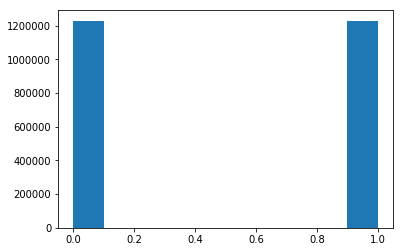

In [39]:
# Imbalance in Medium_Term_Deposit
plt.hist(y_MTD_acc)
y_MTD_acc.shape

In [40]:
#XGBoost model 1 for Medium_Term_Deposit
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Training and testing datasplits
seed = 100
test_size = 0.33
X_train_MTD_acc, X_test_MTD_acc, y_train_MTD_acc, y_test_MTD_acc= train_test_split(X_MTD_acc,y_MTD_acc,test_size=test_size, random_state=seed)

# Train the XGboost model
model = XGBClassifier(n_jobs=-1,gamma=2,learning_rate=0.1,max_depth=60,n_estimators=70)
model.fit(X_train_MTD_acc, y_train_MTD_acc)
predictions_MTD_acc = model.predict(X_test_MTD_acc)
pred_prob_MTD_acc = model.predict_proba(X_test_MTD_acc)

# Check the accuracy
accuracy_MTD_acc = accuracy_score(y_test_MTD_acc, predictions_MTD_acc)
print("Accuracy: %.2f%%" % (accuracy_MTD_acc * 100.0))

Accuracy: 99.56%


In [41]:
# Log loss for Medium_Term_Deposit
from sklearn.metrics import log_loss
log_loss(y_test_MTD_acc,pred_prob_MTD_acc)

0.041427104756605396

In [42]:
#Classification Report and confusion matrix - model 1 for Medium_Term_Deposit
from sklearn.metrics import classification_report
print("classification_report for Medium_Term_Deposit:")
print(classification_report(y_test_MTD_acc,predictions_MTD_acc))

from sklearn.metrics import confusion_matrix
M_MTD_ac=confusion_matrix(y_test_MTD_acc,predictions_MTD_acc)
print("Confusion matrix for model_xgboost_MTD_Acc:")
print(M_MTD_ac)

classification_report for Medium_Term_Deposit:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    405710
           1       0.99      1.00      1.00    405629

   micro avg       1.00      1.00      1.00    811339
   macro avg       1.00      1.00      1.00    811339
weighted avg       1.00      1.00      1.00    811339

Confusion matrix for model_xgboost_MTD_Acc:
[[402420   3290]
 [   298 405331]]


In [43]:
# save the model to disk
import pickle
filename = 'mtd_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [4]:
# Oversampling to decrease imbalance in product columns for Long_Term_Deposit
from imblearn.over_sampling import SMOTE

X_LTD_acc = train_data[features]
y_LTD_acc = train_data['Long_Term_Deposit']

sm = SMOTE()
X_LTD_acc,y_LTD_acc = sm.fit_sample(X_LTD_acc, y_LTD_acc )

(2323510,)

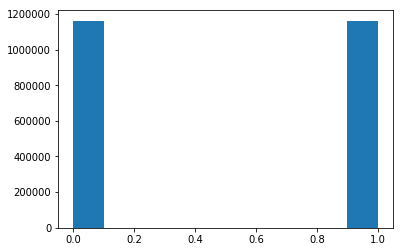

In [5]:
# Imbalance in Long_Term_Deposit
plt.hist(y_LTD_acc)
y_LTD_acc.shape

In [ ]:
#XGBoost model 1 for Long_Term_Deposit
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Training and testing datasplits
seed = 100
test_size = 0.33
X_train_LTD_acc, X_test_LTD_acc, y_train_LTD_acc, y_test_LTD_acc= train_test_split(X_LTD_acc,y_LTD_acc,test_size=test_size, random_state=seed)

# Train the XGboost model
model = XGBClassifier(n_jobs=-1,gamma=2,learning_rate=0.1,max_depth=70,n_estimators=70)
model.fit(X_train_LTD_acc, y_train_LTD_acc)
predictions_LTD_acc = model.predict(X_test_LTD_acc)
pred_prob_LTD_acc = model.predict_proba(X_test_LTD_acc)

# Check the accuracy
accuracy_LTD_acc = accuracy_score(y_test_LTD_acc, predictions_LTD_acc)
print("Accuracy: %.2f%%" % (accuracy_LTD_acc * 100.0))

In [ ]:
# Log loss for Long_Term_Deposit
from sklearn.metrics import log_loss
log_loss(y_test_LTD_acc,pred_prob_LTD_acc)

In [ ]:
#Classification Report and confusion matrix - model 1 for Long_Term_Deposit
from sklearn.metrics import classification_report
print("classification_report for Long_Term_Deposit:")
print(classification_report(y_test_LTD_acc,predictions_LTD_acc))

from sklearn.metrics import confusion_matrix
M_LTD_ac=confusion_matrix(y_test_LTD_acc,predictions_LTD_acc)
print("Confusion matrix for model_xgboost_LTD_Acc:")
print(M_LTD_ac)

In [ ]:
# save the model to disk
import pickle
filename = 'ltd_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# Oversampling to decrease imbalance in product columns for E_Account
from imblearn.over_sampling import SMOTE

X_E_acc = train_data[features]
y_E_acc = train_data['E_Account']

sm = SMOTE()
X_E_acc,y_E_acc = sm.fit_sample(X_E_acc, y_E_acc )

In [ ]:
# Imbalance in E_Account
plt.hist(y_E_acc)
y_E_acc.shape

In [18]:
#XGBoost model 1 for E_Account
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Training and testing datasplits
seed = 100
test_size = 0.33
X_train_E_acc, X_test_E_acc, y_train_E_acc, y_test_E_acc= train_test_split(X_E_acc,y_E_acc,test_size=test_size, random_state=seed)

# Train the XGboost model
model = XGBClassifier(n_jobs=-1,gamma=2,learning_rate=0.1,max_depth=70,n_estimators=80)
model.fit(X_train_E_acc, y_train_E_acc)
predictions_E_acc = model.predict(X_test_E_acc)
pred_prob_E_acc = model.predict_proba(X_test_E_acc)

# Check the accuracy
accuracy_E_acc = accuracy_score(y_test_E_acc, predictions_E_acc)
print("Accuracy: %.2f%%" % (accuracy_E_acc * 100.0))

Accuracy: 95.89%


In [19]:
# Log loss for E_Account
from sklearn.metrics import log_loss
log_loss(y_test_E_acc,pred_prob_E_acc)

0.1260951105944367

In [20]:
#Classification Report and confusion matrix - model 1 for E_Account
from sklearn.metrics import classification_report
print("classification_report for E_Account:")
print(classification_report(y_test_E_acc,predictions_E_acc))

from sklearn.metrics import confusion_matrix
M_E_ac=confusion_matrix(y_test_E_acc,predictions_E_acc)
print("Confusion matrix for model_xgboost_E_Acc:")
print(M_E_ac)

classification_report for E_Account:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96    366911
           1       0.94      0.98      0.96    367207

   micro avg       0.96      0.96      0.96    734118
   macro avg       0.96      0.96      0.96    734118
weighted avg       0.96      0.96      0.96    734118

Confusion matrix for model_xgboost_E_Acc:
[[345531  21380]
 [  8757 358450]]


In [21]:
# save the model to disk
import pickle
filename = 'eacc_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# Oversampling to decrease imbalance in product columns for Funds
from imblearn.over_sampling import SMOTE

X_Funds = train_data[features]
y_Funds = train_data['Funds']

sm = SMOTE()
X_Funds,y_Funds = sm.fit_sample(X_Funds, y_Funds )

In [ ]:
# Imbalance in Funds
plt.hist(y_Funds)
y_Funds.shape

In [ ]:
#XGBoost model 1 for Funds
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Training and testing datasplits
seed = 100
test_size = 0.33
X_train_Funds, X_test_Funds, y_train_Funds, y_test_Funds= train_test_split(X_Funds,y_Funds,test_size=test_size, random_state=seed)

# Train the XGboost model
model = XGBClassifier(n_jobs=-1,gamma=2,learning_rate=0.1,max_depth=70,n_estimators=90)
model.fit(X_train_Funds, y_train_Funds)
predictions_Funds = model.predict(X_test_Funds)
pred_prob_Funds = model.predict_proba(X_test_Funds)

# Check the accuracy
accuracy_Funds = accuracy_score(y_test_Funds, predictions_Funds)
print("Accuracy: %.2f%%" % (accuracy_Funds * 100.0))

In [ ]:
# Log loss for Funds
from sklearn.metrics import log_loss
log_loss(y_test_Funds,pred_prob_Funds)

In [ ]:
#Classification Report and confusion matrix - model 1 for Funds
from sklearn.metrics import classification_report
print("classification_report for Funds:")
print(classification_report(y_test_Funds,predictions_Funds))

from sklearn.metrics import confusion_matrix
M_Funds=confusion_matrix(y_test_Funds,predictions_Funds)
print("Confusion matrix for model_xgboost_Funds:")
print(M_Funds)

In [ ]:
# save the model to disk
import pickle
filename = 'funds_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# Oversampling to decrease imbalance in product columns for Mortgage
from imblearn.over_sampling import SMOTE

X_Mortgage = train_data[features]
y_Mortgage = train_data['Mortgage']

sm = SMOTE()
X_Mortgage,y_Mortgage = sm.fit_sample(X_Mortgage, y_Mortgage )

In [ ]:
# Imbalance in Mortgage
plt.hist(y_Mortgage)
y_Mortgage.shape

In [ ]:
#XGBoost model 1 for Mortgage
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Training and testing datasplits
seed = 100
test_size = 0.33
X_train_Mortgage, X_test_Mortgage, y_train_Mortgage, y_test_Mortgage= train_test_split(X_Mortgage,y_Mortgage,test_size=test_size, random_state=seed)

# Train the XGboost model
model = XGBClassifier(n_jobs=-1,gamma=2,learning_rate=0.1,max_depth=70,n_estimators=90)
model.fit(X_train_Mortgage, y_train_Mortgage)
predictions_Mortgage = model.predict(X_test_Mortgage)
pred_prob_Mortgage = model.predict_proba(X_test_Mortgage)

# Check the accuracy
accuracy_Mortgage = accuracy_score(y_test_Mortgage, predictions_Mortgage)
print("Accuracy: %.2f%%" % (accuracy_Mortgage * 100.0))

In [ ]:
# Log loss for Mortgage
from sklearn.metrics import log_loss
log_loss(y_test_Mortgage,pred_prob_Mortgage)

In [ ]:
#Classification Report and confusion matrix - model 1 for Mortgage
from sklearn.metrics import classification_report
print("classification_report for Mortgage:")
print(classification_report(y_test_Mortgage,predictions_Mortgage))

from sklearn.metrics import confusion_matrix
M_Mortgage=confusion_matrix(y_test_Mortgage,predictions_Mortgage)
print("Confusion matrix for model_xgboost_Mortgage:")
print(M_Mortgage)

In [ ]:
# save the model to disk
import pickle
filename = 'mortgage_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# Oversampling to decrease imbalance in product columns for Pensions1
from imblearn.over_sampling import SMOTE

X_Pensions1 = train_data[features]
y_Pensions1 = train_data['Pensions1']

sm = SMOTE()
X_Pensions1,y_Pensions1 = sm.fit_sample(X_Pensions1, y_Pensions1)

In [ ]:
# Imbalance in Pensions1
plt.hist(y_Pensions1)
y_Pensions1.shape

In [ ]:
#XGBoost model 1 for Pensions1
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Training and testing datasplits
seed = 100
test_size = 0.33
X_train_Pensions1, X_test_Pensions1, y_train_Pensions1, y_test_Pensions1= train_test_split(X_Pensions1,y_Pensions1,test_size=test_size, random_state=seed)

# Train the XGboost model
model = XGBClassifier(n_jobs=-1,gamma=2,learning_rate=0.1,max_depth=70,n_estimators=90)
model.fit(X_train_Pensions1, y_train_Pensions1)
predictions_Pensions1 = model.predict(X_test_Pensions1)
pred_prob_Pensions1 = model.predict_proba(X_test_Pensions1)

# Check the accuracy
accuracy_Pensions1 = accuracy_score(y_test_Pensions1, predictions_Pensions1)
print("Accuracy: %.2f%%" % (accuracy_Pensions1 * 100.0))

In [ ]:
# Log loss for Pensions1
from sklearn.metrics import log_loss
log_loss(y_test_Pensions1,pred_prob_Pensions1)

In [ ]:
#Classification Report and confusion matrix - model 1 for Pensions1
from sklearn.metrics import classification_report
print("classification_report for Pensions1:")
print(classification_report(y_test_Pensions1,predictions_Pensions1))

from sklearn.metrics import confusion_matrix
M_Pensions1=confusion_matrix(y_test_Pensions1,predictions_Pensions1)
print("Confusion matrix for model_xgboost_Pensions1:")
print(M_Pensions1)

In [ ]:
# save the model to disk
import pickle
filename = 'pen1_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# Oversampling to decrease imbalance in product columns for Pensions2
from imblearn.over_sampling import SMOTE

X_Pensions2 = train_data[features]
y_Pensions2 = train_data['Pensions2']

sm = SMOTE()
X_Pensions2,y_Pensions2 = sm.fit_sample(X_Pensions2, y_Pensions2)

In [ ]:
# Imbalance in pensions2
plt.hist(y_Pensions2)
y_Pensions2.shape

In [ ]:
#XGBoost model 1 for Pensions2
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Training and testing datasplits
seed = 100
test_size = 0.33
X_train_Pensions2, X_test_Pensions2, y_train_Pensions2, y_test_Pensions2= train_test_split(X_Pensions2,y_Pensions2,test_size=test_size, random_state=seed)

# Train the XGboost model
model = XGBClassifier(n_jobs=-1,gamma=2,learning_rate=0.1,max_depth=70,n_estimators=90)
model.fit(X_train_Pensions2, y_train_Pensions2)
predictions_Pensions2 = model.predict(X_test_Pensions2)
pred_prob_Pensions2 = model.predict_proba(X_test_Pensions2)

# Check the accuracy
accuracy_Pensions2 = accuracy_score(y_test_Pensions2, predictions_Pensions2)
print("Accuracy: %.2f%%" % (accuracy_Pensions2 * 100.0))

In [ ]:
# Log loss for Pensions2
from sklearn.metrics import log_loss
log_loss(y_test_Pensions2,pred_prob_Pensions2)

In [ ]:
#Classification Report and confusion matrix - model 1 for Pensions2
from sklearn.metrics import classification_report
print("classification_report for Pensions2:")
print(classification_report(y_test_Pensions2,predictions_Pensions2))

from sklearn.metrics import confusion_matrix
M_Pensions2=confusion_matrix(y_test_Pensions2,predictions_Pensions2)
print("Confusion matrix for model_xgboost_Pensions2:")
print(M_Pensions2)

In [ ]:
# save the model to disk
import pickle
filename = 'pen2_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# Oversampling to decrease imbalance in product columns for Loans
from imblearn.over_sampling import SMOTE

X_Loans = train_data[features]
y_Loans = train_data['Loans']

sm = SMOTE()
X_Loans,y_Loans = sm.fit_sample(X_Loans, y_Loans)

In [ ]:
# Imbalance in Loans
plt.hist(y_Loans)
y_Loans.shape

In [ ]:
#XGBoost model 1 for Loans
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Training and testing datasplits
seed = 100
test_size = 0.33
X_train_Loans, X_test_Loans, y_train_Loans, y_test_Loans= train_test_split(X_Loans,y_Loans,test_size=test_size, random_state=seed)

# Train the XGboost model
model = XGBClassifier(n_jobs=-1,gamma=2,learning_rate=0.1,max_depth=60,n_estimators=70)
model.fit(X_train_Loans, y_train_Loans)
predictions_Loans = model.predict(X_test_Loans)
pred_prob_Loans = model.predict_proba(X_test_Loans)

# Check the accuracy
accuracy_Loans = accuracy_score(y_test_Loans, predictions_Loans)
print("Accuracy: %.2f%%" % (accuracy_Loans * 100.0))

In [ ]:
# Log loss for Loans
from sklearn.metrics import log_loss
log_loss(y_test_Loans,pred_prob_Loans)

In [ ]:
#Classification Report and confusion matrix - model 1 for Loans
from sklearn.metrics import classification_report
print("classification_report for Loans:")
print(classification_report(y_test_Loans,predictions_Loans))

from sklearn.metrics import confusion_matrix
M_Loans=confusion_matrix(y_test_Loans,predictions_Loans)
print("Confusion matrix for model_xgboost_Loans:")
print(M_Loans)

In [ ]:
# save the model to disk
import pickle
filename = 'loan_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# Oversampling to decrease imbalance in product columns for Taxes
from imblearn.over_sampling import SMOTE

X_Taxes = train_data[features]
y_Taxes = train_data['Taxes']

sm = SMOTE()
X_Taxes,y_Taxes = sm.fit_sample(X_Taxes, y_Taxes)

In [ ]:
# Imbalance in Taxes
plt.hist(y_Taxes)
y_Taxes.shape

In [ ]:
#XGBoost model 1 for Taxes
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Training and testing datasplits
seed = 100
test_size = 0.33
X_train_Taxes, X_test_Taxes, y_train_Taxes, y_test_Taxes= train_test_split(X_Taxes,y_Taxes,test_size=test_size, random_state=seed)

# Train the XGboost model
model = XGBClassifier(n_jobs=-1,gamma=2,learning_rate=0.1,max_depth=70,n_estimators=90)
model.fit(X_train_Taxes, y_train_Taxes)
predictions_Taxes = model.predict(X_test_Taxes)
pred_prob_Taxes = model.predict_proba(X_test_Taxes)

# Check the accuracy
accuracy_Taxes = accuracy_score(y_test_Taxes, predictions_Taxes)
print("Accuracy: %.2f%%" % (accuracy_Taxes * 100.0))

In [ ]:
# Log loss for Taxes
from sklearn.metrics import log_loss
log_loss(y_test_Taxes,pred_prob_Taxes)

In [ ]:
#Classification Report and confusion matrix - model 1 for Taxes
from sklearn.metrics import classification_report
print("classification_report for Taxes:")
print(classification_report(y_test_Taxes,predictions_Taxes))

from sklearn.metrics import confusion_matrix
M_Taxes=confusion_matrix(y_test_Taxes,predictions_Taxes)
print("Confusion matrix for model_xgboost_Taxes:")
print(M_Taxes)

In [ ]:
# save the model to disk
import pickle
filename = 'Taxes_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# Oversampling to decrease imbalance in product columns for Guarantees
from imblearn.over_sampling import SMOTE

X_Guarantees = train_data[features]
y_Guarantees = train_data['Guarantees']

sm = SMOTE()
X_Guarantees,y_Guarantees = sm.fit_sample(X_Guarantees, y_Guarantees)

In [ ]:
# Imbalance in Guarantees
plt.hist(y_Guarantees)
y_Taxes.shape

In [ ]:
#XGBoost model 1 for Guarantees
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Training and testing datasplits
seed = 100
test_size = 0.33
X_train_Guarantees, X_test_Guarantees, y_train_Guarantees, y_test_Guarantees= train_test_split(X_Guarantees,y_Guarantees,test_size=test_size, random_state=seed)

# Train the XGboost model
model = XGBClassifier(n_jobs=-1,gamma=2,learning_rate=0.1,max_depth=60,n_estimators=70)
model.fit(X_train_Guarantees, y_train_Guarantees)
predictions_Guarantees = model.predict(X_test_Guarantees)
pred_prob_Guarantees = model.predict_proba(X_test_Guarantees)

# Check the accuracy
accuracy_Guarantees = accuracy_score(y_test_Guarantees, predictions_Guarantees)
print("Accuracy: %.2f%%" % (accuracy_Guarantees * 100.0))

In [ ]:
# Log loss for Guarantees
from sklearn.metrics import log_loss
log_loss(y_test_Guarantees,pred_prob_Guarantees)

In [ ]:
#Classification Report and confusion matrix - model 1 for Guarantees
from sklearn.metrics import classification_report
print("classification_report for Guarantees:")
print(classification_report(y_test_Guarantees,predictions_Guarantees))

from sklearn.metrics import confusion_matrix
M_Guarantees=confusion_matrix(y_test_Guarantees,predictions_Guarantees)
print("Confusion matrix for model_xgboost_Guarantees:")
print(M_Guarantees)

In [ ]:
# save the model to disk
import pickle
filename = 'Guarantees_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# Oversampling to decrease imbalance in product columns for Credit_card
from imblearn.over_sampling import SMOTE

X_Credit_card= train_data[features]
y_Credit_card = train_data['Credit_card']

sm = SMOTE()
X_Credit_card,y_Credit_card = sm.fit_sample(X_Credit_card, y_Credit_card)

In [ ]:
# Imbalance in Credit_card
plt.hist(y_Credit_card)
y_Credit_card.shape

In [6]:
#XGBoost model 1 for credit card
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Training and testing datasplits
seed = 100
test_size = 0.33
X_train_Credit_card, X_test_Credit_card, y_train_Credit_card, y_test_Credit_card= train_test_split(X_Credit_card,y_Credit_card,test_size=test_size, random_state=seed)

# Train the XGboost model
model = XGBClassifier(n_jobs=-1,gamma=2,learning_rate=0.1,max_depth=60,n_estimators=70)
model.fit(X_train_Credit_card, y_train_Credit_card)
predictions_Credit_card = model.predict(X_test_Credit_card)
pred_prob_Credit_card = model.predict_proba(X_test_Credit_card)

# Check the accuracy
accuracy_Credit_card = accuracy_score(y_test_Credit_card, predictions_Credit_card)
print("Accuracy: %.2f%%" % (accuracy_Credit_card * 100.0))

Accuracy: 96.91%


In [7]:
# Log loss for Credit_card
from sklearn.metrics import log_loss
log_loss(y_test_Credit_card,pred_prob_Credit_card)

0.10055274039509474

In [8]:
#Classification Report and confusion matrix - model 1 for Credit_card
from sklearn.metrics import classification_report
print("classification_report for Credit_card:")
print(classification_report(y_test_Credit_card,predictions_Credit_card))

from sklearn.metrics import confusion_matrix
M_Credit_card=confusion_matrix(y_test_Credit_card,predictions_Credit_card)
print("Confusion matrix for model_xgboost_Credit_card:")
print(M_Credit_card)

classification_report for Credit_card:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97    383580
           1       0.95      0.99      0.97    384104

   micro avg       0.97      0.97      0.97    767684
   macro avg       0.97      0.97      0.97    767684
weighted avg       0.97      0.97      0.97    767684

Confusion matrix for model_xgboost_Credit_card:
[[365442  18138]
 [  5614 378490]]


In [9]:
# save the model to disk
import pickle
filename = 'Credit_card_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# Oversampling to decrease imbalance in product columns for Securities
from imblearn.over_sampling import SMOTE

X_Securities= train_data[features]
y_Securities = train_data['Securities']

sm = SMOTE()
X_Securities,y_Securities = sm.fit_sample(X_Securities, y_Securities)

In [ ]:
# Imbalance in Securities
plt.hist(y_Securities)
y_Securities.shape

In [ ]:
#XGBoost model 1 for Securities
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Training and testing datasplits
seed = 100
test_size = 0.33
X_train_Securities, X_test_Securities, y_train_Securities, y_test_Securities= train_test_split(X_Securities,y_Securities,test_size=test_size, random_state=seed)

# Train the XGboost model
model = XGBClassifier(n_jobs=-1,gamma=2,learning_rate=0.1,max_depth=60,n_estimators=70)
model.fit(X_train_Securities, y_train_Securities)
predictions_Securities = model.predict(X_test_Securities)
pred_prob_Securities = model.predict_proba(X_test_Securities)

# Check the accuracy
accuracy_Securities = accuracy_score(y_test_Securities, predictions_Securities)
print("Accuracy: %.2f%%" % (accuracy_Securities * 100.0))

In [ ]:
# Log loss for Securities
from sklearn.metrics import log_loss
log_loss(y_test_Securities,pred_prob_Securities)

In [ ]:
#Classification Report and confusion matrix - model 1 for Securities
from sklearn.metrics import classification_report
print("classification_report for Securities:")
print(classification_report(y_test_Securities,predictions_Securities))

from sklearn.metrics import confusion_matrix
M_Securities=confusion_matrix(y_test_Securities,predictions_Securities)
print("Confusion matrix for model_xgboost_Securities:")
print(M_Securities)

In [ ]:
# save the model to disk
import pickle
filename = 'securities_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# Oversampling to decrease imbalance in product columns for Home_Account
from imblearn.over_sampling import SMOTE

X_Home_Account= train_data[features]
y_Home_Account = train_data['Home_Account']

sm = SMOTE()
X_Home_Account,y_Home_Account = sm.fit_sample(X_Home_Account, y_Home_Account)

In [ ]:
# Imbalance in Securities
plt.hist(y_Home_Account)
y_Home_Account.shape

In [ ]:
#XGBoost model 1 for Home_Account
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Training and testing datasplits
seed = 100
test_size = 0.33
X_train_Home_Account, X_test_Home_Account, y_train_Home_Account, y_test_Home_Account= train_test_split(X_Home_Account,y_Home_Account,test_size=test_size, random_state=seed)

# Train the XGboost model
model = XGBClassifier(n_jobs=-1,gamma=2,learning_rate=0.1,max_depth=60,n_estimators=70)
model.fit(X_train_Home_Account, y_train_Home_Account)
predictions_Home_Account = model.predict(X_test_Home_Account)
pred_prob_Home_Account = model.predict_proba(X_test_Home_Account)

# Check the accuracy
accuracy_Home_Account = accuracy_score(y_test_Home_Account, predictions_Home_Account)
print("Accuracy: %.2f%%" % (accuracy_Home_Account * 100.0))

In [ ]:
# Log loss for Home_Account
from sklearn.metrics import log_loss
log_loss(y_test_Home_Account,pred_prob_Home_Account)

In [ ]:
#Classification Report and confusion matrix - model 1 for Home_Account
from sklearn.metrics import classification_report
print("classification_report for Home_Account:")
print(classification_report(y_test_Home_Account,predictions_Home_Account))

from sklearn.metrics import confusion_matrix
M_Home_Account=confusion_matrix(y_test_Home_Account,predictions_Home_Account)
print("Confusion matrix for model_xgboost_Home_Account:")
print(M_Home_Account)

In [ ]:
# save the model to disk
import pickle
filename = 'Home_Account_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# Oversampling to decrease imbalance in product columns for Direct_Debit
from imblearn.over_sampling import SMOTE

X_Direct_Debit= train_data[features]
y_Direct_Debit = train_data['Direct_Debit']

sm = SMOTE()
X_Direct_Debit,y_Direct_Debit = sm.fit_sample(X_Direct_Debit, y_Direct_Debit)

In [ ]:
# Imbalance in Direct_Debit
plt.hist(y_Direct_Debit)
y_Direct_Debit.shape

In [12]:
#XGBoost model 1 for Direct_Debit
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Training and testing datasplits
seed = 100
test_size = 0.33
X_train_Direct_Debit, X_test_Direct_Debit, y_train_Direct_Debit, y_test_Direct_Debit= train_test_split(X_Direct_Debit,y_Direct_Debit,test_size=test_size, random_state=seed)

# Train the XGboost model
model = XGBClassifier(n_jobs=-1,gamma=2,learning_rate=0.1,max_depth=70,n_estimators=70)
model.fit(X_train_Direct_Debit, y_train_Direct_Debit)
predictions_Direct_Debit = model.predict(X_test_Direct_Debit)
pred_prob_Direct_Debit = model.predict_proba(X_test_Direct_Debit)

# Check the accuracy
accuracy_Direct_Debit = accuracy_score(y_test_Direct_Debit, predictions_Direct_Debit)
print("Accuracy: %.2f%%" % (accuracy_Direct_Debit * 100.0))

Accuracy: 93.17%


In [13]:
# Log loss for Direct_Debit
from sklearn.metrics import log_loss
log_loss(y_test_Direct_Debit,pred_prob_Direct_Debit)

0.18310161908314443

In [14]:
#Classification Report and confusion matrix - model 1 for Direct_Debit
from sklearn.metrics import classification_report
print("classification_report for Home_Account:")
print(classification_report(y_test_Direct_Debit,predictions_Direct_Debit))

from sklearn.metrics import confusion_matrix
M_Direct_Debit=confusion_matrix(y_test_Direct_Debit,predictions_Direct_Debit)
print("Confusion matrix for model_xgboost_Direct_Debit:")
print(M_Direct_Debit)

classification_report for Home_Account:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93    344606
           1       0.91      0.96      0.93    344207

   micro avg       0.93      0.93      0.93    688813
   macro avg       0.93      0.93      0.93    688813
weighted avg       0.93      0.93      0.93    688813

Confusion matrix for model_xgboost_Direct_Debit:
[[312945  31661]
 [ 15375 328832]]


In [15]:
# save the model to disk
import pickle
filename = 'direct_debit_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# Oversampling to decrease imbalance in product columns for payroll
from imblearn.over_sampling import SMOTE

X_payroll= train_data[features]
y_payroll = train_data['Payroll']

sm = SMOTE()
X_payroll,y_payroll = sm.fit_sample(X_payroll, y_payroll)

In [ ]:
# Imbalance in Direct_Debit
plt.hist(y_payroll)
y_payroll.shape

In [ ]:
#XGBoost model 1 for Payroll
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Training and testing datasplits
seed = 100
test_size = 0.33
X_train_payroll, X_test_payroll, y_train_payroll, y_test_payroll = train_test_split(X_payroll,y_payroll,test_size=test_size, random_state=seed)

# Train the XGboost model
model = XGBClassifier(n_jobs=-1,gamma=2,learning_rate=0.1,max_depth=60,n_estimators=70)
model.fit(X_train_payroll, y_train_payroll)
predictions_payroll = model.predict(X_test_payroll)
pred_prob_payroll = model.predict_proba(X_test_payroll)

# Check the accuracy
accuracy_payroll = accuracy_score(y_test_payroll, predictions_payroll)
print("Accuracy: %.2f%%" % (accuracy_payroll * 100.0))

In [ ]:
# Log loss for Payroll
from sklearn.metrics import log_loss
log_loss(y_test_payroll,pred_prob_payroll)

In [ ]:
#Classification Report and confusion matrix - model 1 for Payroll
from sklearn.metrics import classification_report
print("classification_report for Home_Account:")
print(classification_report(y_test_payroll,predictions_payroll))

from sklearn.metrics import confusion_matrix
M_payroll=confusion_matrix(y_test_payroll,predictions_payroll)
print("Confusion matrix for model_xgboost_payroll:")
print(M_payroll)

In [ ]:
# save the model to disk
import pickle
filename = 'payroll_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
models=['current_model.sav','derivada_model.sav','junior_acc_model.sav','mpa_model.sav','mtd_model.sav','particluar_acc_model.sav','payroll_model.sav','ppa_model.sav','saving_model.sav','std_model.sav','Credit_card_model.sav','direct_debit_model.sav',"eacc_model.sav"]

In [ ]:
import pickle
customer_id=train_data['Customer_Code'].unique()
Products=['Current Account','Derivada Account','Junior Account','Mass Particular Account','medium term deposit','Particular Account','Payroll Account','particular plus Account','saving Account','short term deposit','Credit Card','Direct Debit',"E-Account"]

for i in customer_id:
    cust_info_feature=train_data[train_data['Customer_Code']==i][features].values

    product_predictions={}

    for j in range(len(models)):
        model = models[j]
        product = Products[j]
        ml_model=pickle.load(open(model,'rb'))
        product_predictions[product]=ml_model.predict_proba(cust_info_feature)[0][1]
    print("Customer_ID:",i)
    print(product_predictions)
    print("###########################")